#  Метод главных компонент

До сих пор мы подробно рассматривали оцениватели (модели), основанные на обучении с учителем: те модели, которые предсказывают метки на основе размеченных обучающих данных.
Теперь мы рассмотрим несколько методов обучения без учителя, которые могут выделить интересные аспекты данных без привязки к каким-либо известным меткам.

Рассмотрим, пожалуй, один из наиболее широко используемых алгоритмов без учителя - метод главных компонент (PCA).
По своей сути PCA - это алгоритм понижения размерности, но он также может быть полезен в качестве инструмента визуализации, фильтрации шумов, выделения и проектирования признаков и многого другого.
После краткого концептуального обсуждения алгоритма PCA мы рассмотрим несколько примеров его дальнейшего применения.

Начнем со стандартного импорта:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Введение в PCA

Метод главных компонент - это быстрый и гибкий метод снижения размерности данных.
Его поведение проще всего представить на примере двумерного набора данных.
Пусть даны следующие 200 точек:

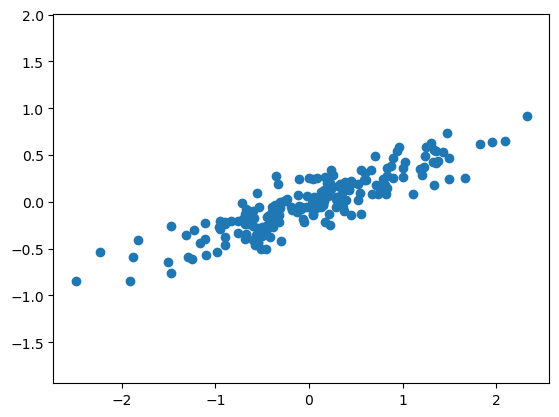

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

На глаз видно, что между переменными *x* и *y* существует почти линейная зависимость.
Это напоминает данные линейной регрессии, но постановка задачи здесь несколько иная: вместо того чтобы пытаться *предсказать* значения *y* по значениям *x*, задача обучения без учителя пытается выявить *взаимосвязи* между значениями *x* и *y*.

В анализе главных компонент эта связь определяется путем нахождения списка *главных осей* в данных и использования этих осей для описания набора данных.
Используя `PCA` в Scikit-Learn, мы можем вычислить это следующим образом:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

В результате обучения из данных извлекаются некоторые величины, в первую очередь компоненты и объясненная дисперсия:

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Чтобы понять, что означают эти числа, давайте представим их в виде векторов на входных данных, используя компоненты для определения направления вектора и объясненную дисперсию для определения квадрата длины вектора (см. следующий рисунок):

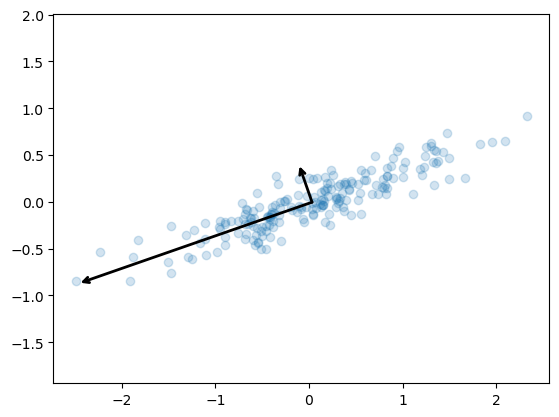

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Эти векторы представляют собой главные оси данных, а длина каждого вектора указывает на то, насколько "важна" эта ось для описания распределения данных - точнее, это мера дисперсии данных при проецировании на эту ось.
Проекции каждой точки данных на главные оси являются главными компонентами данных.

Если мы построим график этих главных компонент рядом с исходными данными, то получим графики, показанные на следующем рисунке:

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

[Text(0.5, 0, 'компонента 1'),
 Text(0, 0.5, 'компонента 2'),
 Text(0.5, 1.0, 'Главные компоненты'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

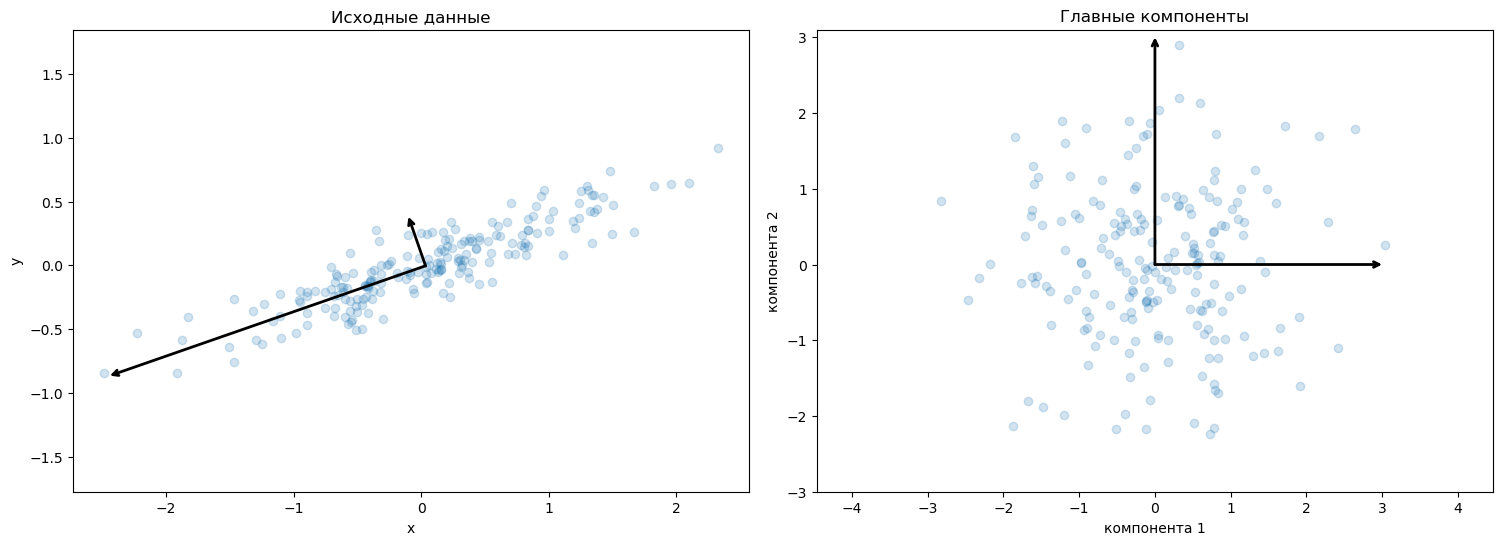

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Рисуем данные
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='Исходные данные')

# Рисуем главные компоненты
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='компонента 1', ylabel='компонента 2',
          title='Главные компоненты',
          xlim=(-5, 5), ylim=(-3, 3.1))


Это преобразование осей данных к главным осям является *аффинным преобразованием*, то есть состоит из движения, вращения и равномерного масштабирования.

Хотя этот алгоритм поиска главных компонент может показаться просто математической диковинкой, он имеет очень широкое применение в мире машинного обучения и исследования данных.

### PCA как метод понижения размерности

Использование PCA для понижения размерности предполагает обнуление одной или нескольких наименьших главных компонент, в результате чего получается более низкоразмерная проекция данных, сохраняющая максимальную дисперсию данных.

Вот пример использования PCA в качестве преобразования для уменьшения размерности:

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("Исходная размерность:   ", X.shape)
print("Преобразованная размерность:", X_pca.shape)

Исходная размерность:    (200, 2)
Преобразованная размерность: (200, 1)


Преобразованные данные были сведены к одной размерности.
Чтобы понять эффект от снижения размерности, мы можем выполнить обратное преобразование этих данных пониженной размерности и построить их график вместе с исходными данными (см. следующий рисунок):

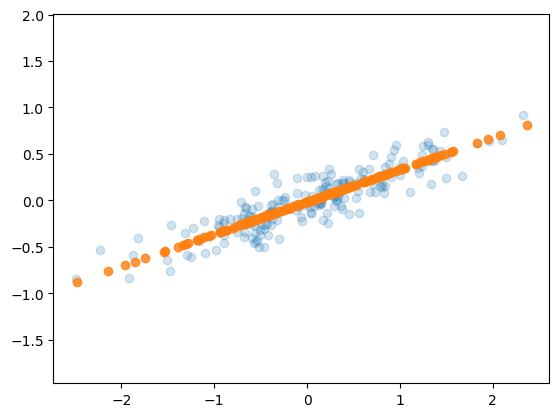

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Светлые точки - это исходные данные, а темные - спроецированная версия.
Таким образом, становится ясно, что означает сокращение размерности в PCA: информация вдоль наименее важной главной оси (или осей) удаляется, оставляя только компоненты данных с наибольшей дисперсией.
Доля дисперсии, которая вырезается (пропорциональная разбросу точек относительно линии, образованной на предыдущем рисунке), является приблизительной мерой того, сколько "информации" отбрасывается при таком снижении размерности.

Этот набор данных с уменьшенной размерностью в некотором смысле "достаточно хорош", чтобы закодировать наиболее важные отношения между точками: несмотря на сокращение числа признаков данных на 50 %, общие отношения между точками данных в основном сохраняются.

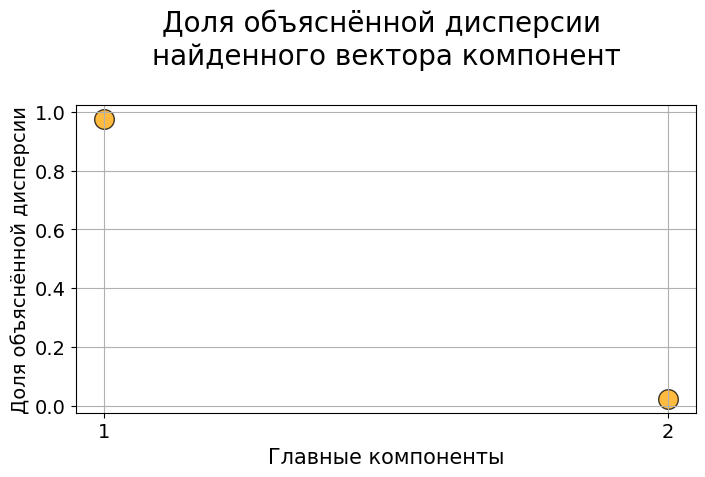

[0.97634101 0.02365899]


In [ ]:
# Найдём для всех компонент
pca = PCA(n_components=None)
f_pca = pca.fit(X)

plt.figure(figsize=(8,4))
plt.scatter(x=[i+1 for i in range(len(f_pca.explained_variance_ratio_))],
            y=f_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Доля объяснённой дисперсии \nнайденного вектора компонент\n",fontsize=20)
plt.xlabel("Главные компоненты",fontsize=15)
plt.xticks([i+1 for i in range(len(f_pca.explained_variance_ratio_))],fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Доля объяснённой дисперсии",fontsize=14)
plt.show()
print(f_pca.explained_variance_ratio_)

Как мы и видим, вектор всего из 1 компоненты объясняет более 97% дисперсии, тогда как добавление второй размерности привнесёт чуть более 2%.

### PCA для визуализации: рукописные цифры

Полезность снижения размерности может быть не совсем очевидной при использовании только двух измерений, но она становится очевидной при рассмотрении высокоразмерных данных.
Чтобы убедиться в этом, давайте рассмотрим применение PCA к набору данных по цифрам.
Начнём с загрузки данных:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Напомним, что набор данных "Цифры" состоит из изображений размером 8 × 8 пикселей, что означает, что векторы являются 64-мерными.
Чтобы получить некоторое представление о взаимосвязях между этими точками, мы можем использовать PCA для проецирования их в более удобное число измерений, например в два:

In [ ]:
pca = PCA(2)  # Проекцируем из 64 в 2 размерности
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Теперь мы можем построить график первых двух главных компонент для каждой точки, чтобы получить информацию о данных, как показано на следующем рисунке:

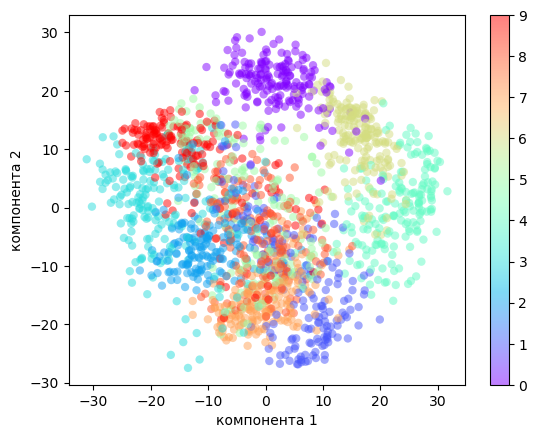

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=matplotlib.colormaps.get_cmap('rainbow'))
plt.xlabel('компонента 1')
plt.ylabel('компонента 2')
plt.colorbar();

Вспомним, что означают эти компоненты: полные данные - это 64-мерное облако точек, а наши точки - проекция каждой точки данных вдоль направлений с наибольшей дисперсией.
По сути, мы нашли оптимальное растяжение и вращение в 64-мерном пространстве, которое позволяет нам увидеть расположение данных в двух измерениях, и мы сделали это методом обучения без учителя, то есть без обращения к меткам.

## Задание

1. Для классификационного набора данных Wine quality из предыдущих лабораторных работ выполните построение главных компонент. Предварительно не забудьте очистить и нормализовать набор данных.
2. Постройте график объясняемой дисперсии. Сделайте выводы по информативности компонент. Постройте классификатор, основанный на деревьях принятия решений (дерево или случайный лес) по компонентам, объясняющим более 75% дисперсии.
3. Включите PCA в цепочку модели и, считая число компонент гиперпараметром, с помощью поиска по сетке (GridSearchCV) определите число компонент и другие гиперпараметры классификатора, дающие более качественный классификатор.
4. Сравните число найденных компонент в п.3 и объясняемую дисперсию с результатом из п.2. Сопоставьте количество новых признаков с набором признаков исходного набора данных.

Пример сборки последовательности, включающей классификатор и PCA можно посмотреть [здесь](https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html). Вы можете взять за основу этот пример для выполнения п.2 задания с вагим классификатором и набором признаков.